In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt

In [2]:
data_url = "rk_timer_word1-293.csv"

In [3]:
rk_df1 = pd.read_csv(data_url)

In [4]:
rk_df1['pat_len'] = [1 for i in rk_df1.index]

In [5]:
rk_df10 = pd.read_csv("rk_timer_word10-293.csv")

In [6]:
rk_df10['pat_len'] = [10 for i in rk_df10.index]

In [7]:
rk_df50 = pd.read_csv("rk_timer_phrase50-293.csv")

In [8]:
rk_df50['pat_len'] = [50 for i in rk_df50.index]

In [9]:
rk_df100 = pd.read_csv("rk_timer_phrase100-293.csv")

In [10]:
rk_df100['pat_len'] = [100 for i in rk_df100.index]

In [12]:
rk_df1000 = pd.read_csv("rk_timer_char1000-293.csv")

In [13]:
rk_df1000['pat_len'] = [1000 for i in rk_df1000.index]

In [14]:
df_list = [rk_df1,rk_df10,rk_df50,rk_df100,rk_df1000]

In [15]:
text_len = []
pat_len = []
time = []

In [16]:
rows = []
cols = []
for df in df_list:
    for i in range(0,len(df.index),5):  
        text_len.append(df['str_len'].values[i])
        time.append(df['duration'].values[i:i+5].mean())
        pat_len.append(df['pat_len'].values[i])



In [17]:
rk_avg_df = pd.DataFrame(columns =['text_len','pat_len','time'])

In [18]:
rk_avg_df

,text_len,pat_len,time


In [19]:
rk_avg_df['text_len']=[i for i in text_len]
rk_avg_df['pat_len']=[i for i in pat_len]
rk_avg_df['time']=[i for i in time]

In [20]:
rk_avg_df

,text_len,pat_len,time
0,13,1,0.00080
1,101,1,0.00122
2,1045,1,0.00560
3,48733,1,0.24044
4,10183,1,0.05176
5,185919,1,0.97130
6,559618,1,2.90810
7,1010777,1,5.10278
8,2665788,1,13.48198
9,4808754,1,24.01768


In [21]:
rk_matrix = rk_avg_df.pivot('text_len','pat_len','time')

In [22]:
rk_avg_df['time'].min()

0.0006399999999999999

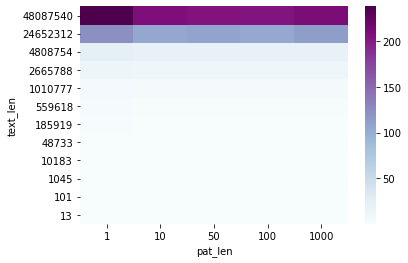

In [23]:
heatmap = sns.heatmap(data=rk_matrix,cmap='BuPu',vmin=rk_avg_df['time'].min(),vmax=rk_avg_df['time'].max()).invert_yaxis()